In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("co2.csv")

In [3]:
df.head()

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2284 non-null   object 
 1   co2     2225 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


# dataset có time thì cần convert sang dạng nhãn tgian(nhãn thời gian) trước thì mới visualize được

In [5]:
df['time'] = pd.to_datetime(df['time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2284 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


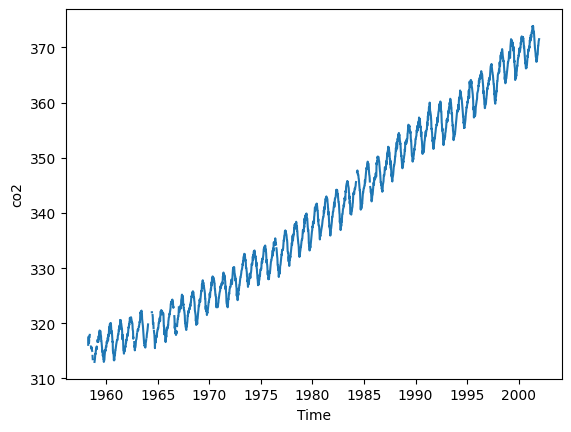

In [7]:
fig, ax = plt.subplots()
ax.plot(df["time"], df['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("co2")
plt.show()

# fill nan = giá trị nội suy

In [8]:
df["co2"].interpolate(inplace= True)

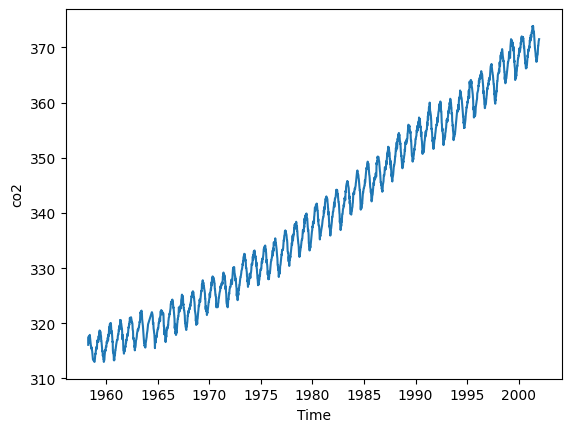

In [9]:
fig, ax = plt.subplots()
ax.plot(df["time"], df['co2'])
ax.set_xlabel("Time")
ax.set_ylabel("co2")
plt.show()

In [10]:
window_size  = 5
def create_data(data, window_size):
    i = 1
    while i < window_size:
        data['co2_{}'.format(i)] = data['co2'].shift(-i)
        i += 1
    data['target'] = data['co2'].shift(-i)
    data = data.dropna(axis = 0)
    return data

In [11]:
data = create_data(df, window_size= window_size)

In [12]:
data.tail()

,time,co2,co2_1,co2_2,co2_3,co2_4,target
2274,2001-10-27,368.7,368.7,368.8,369.7,370.3,370.3
2275,2001-11-03,368.7,368.8,369.7,370.3,370.3,370.8
2276,2001-11-10,368.8,369.7,370.3,370.3,370.8,371.2
2277,2001-11-17,369.7,370.3,370.3,370.8,371.2,371.3
2278,2001-11-24,370.3,370.3,370.8,371.2,371.3,371.5


In [13]:
train_ratio = 0.8
x = data.drop(["target","time"], axis= 1)
y = data['target']

In [14]:
x_train = x[:int(len(data)*train_ratio)]
y_train = y[:int(len(data)*train_ratio)]

x_test = x[int(len(data)*train_ratio) :]
y_test = y[int(len(data)*train_ratio) :]


In [44]:
# ko cần chuẩn hóa dữ liệu vì trong timeseris data dự liệu predict được nội suy với dữ liệu gốc
# có độ chênh lệch ko nhiều

In [15]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred  = reg.predict(x_test)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [18]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9907505918201437
0.3605603788359235
0.2204494736034648


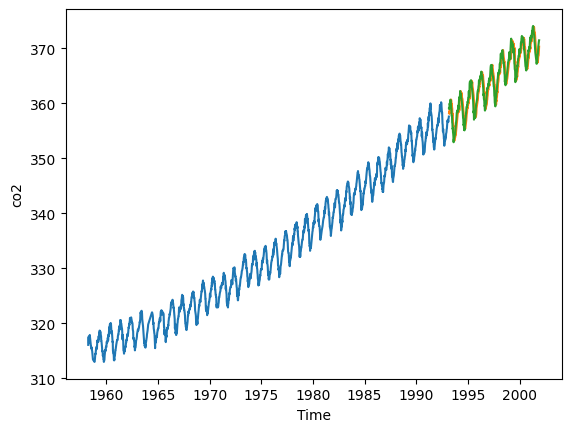

In [20]:
fig, ax = plt.subplots()
ax.plot(data["time"][:int(len(data)*train_ratio)], data['co2'][:int(len(data)*train_ratio)], label = "train")
ax.plot(data["time"][int(len(data)*train_ratio) :], data['co2'][int(len(data)*train_ratio) :], label ="test")
ax.plot(data["time"][int(len(data)*train_ratio):],  y_pred, label ="prediction")
ax.set_xlabel("Time")
ax.set_ylabel("co2")
plt.show()

trong randomforest regression thì các cây con trong mô hình dự đoán chỉ có thể đưa ra dự đoán đúng trong khoảng mà nó được tiếp xúc
còn ngoài khoảng thì sẽ ko dự đoán được
còn trong linear regression thì sẽ ko bị giới hạn khoảng tiếp xúc

In [ ]:
def create_data(data, window_size, target_size):
    i = 1
    while i < window_size:
        data['co2_{}'.format(i)] = data['co2'].shift(-i)
        i += 1

    i = 0
    while i < target_size:
        data['target_{}'.format(i)] = data['co2'].shift(-i-window_size)
        i += 1
    data = data.dropna(axis = 0)
    return data

In [ ]:
data = create_data()